In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import re
import folium

In [3]:
park=pd.read_csv("C:/Users/doyeo/.jupyter/전국도시공원표준데이터.csv",encoding='euc-kr')
park.shape

(18137, 20)

In [4]:
park.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


In [5]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [6]:
park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

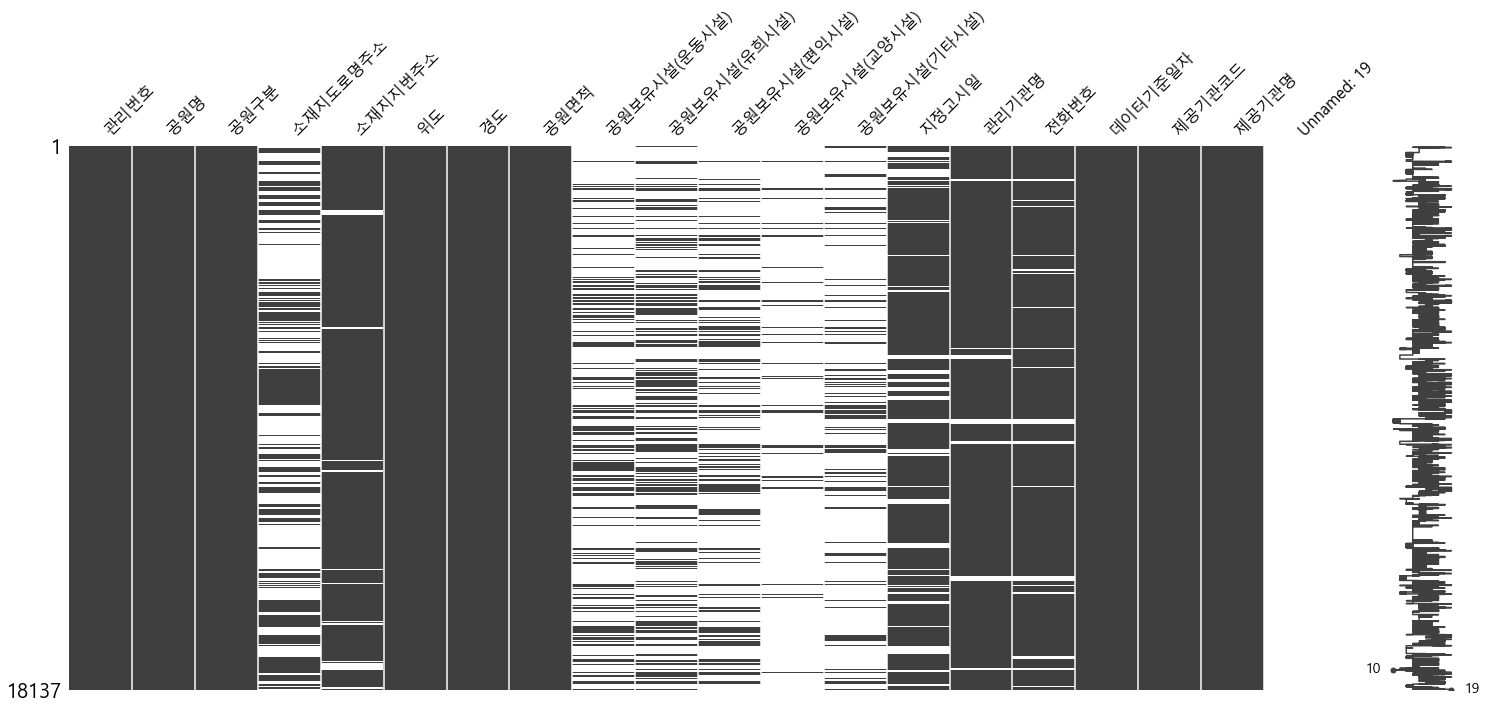

In [7]:
import missingno as msno
from matplotlib import font_manager, rc

rc('font', family='Malgun Gothic')
msno.matrix(park)

In [8]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [9]:
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '제공기관코드', '제공기관명','Unnamed: 19'],inplace=True)

In [10]:
park.shape

(18137, 10)

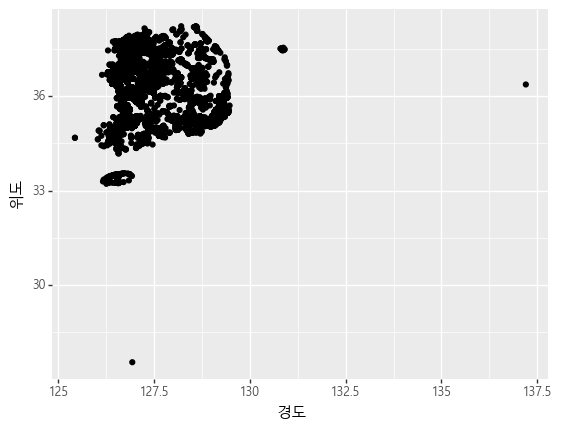

<ggplot: (-9223371866772086480)>

In [11]:
(ggplot(park)
+aes(x='경도',y='위도')
+geom_point()
+theme(text=element_text(family='Malgun Gothic')) 
)

In [12]:
park.dtypes

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
dtype: object

In [13]:
park['공원면적'].head()

0     9137.0
1    33756.0
2      646.0
3     1620.0
4     1009.0
Name: 공원면적, dtype: float64

In [14]:
park['공원면적비율']=park['공원면적'].apply(lambda x: np.sqrt(x)*0.01)
park['공원면적비율'].head()

0    0.955877
1    1.837281
2    0.254165
3    0.402492
4    0.317648
Name: 공원면적비율, dtype: float64

In [15]:
park['소재지지번주소'].isnull().sum()

979

In [16]:
park.loc[(park['소재지지번주소'].notnull())&(park['소재지도로명주소'].isnull())].shape

(10098, 11)

In [17]:
park['소재지도로명주소'].fillna(park['소재지지번주소'],inplace=True)

In [18]:
park['소재지도로명주소'].isnull().sum()

0

In [19]:
park_loc=park.loc[(park['소재지지번주소'].notnull())&(park['소재지도로명주소'].isnull())]
park_loc.shape

(0, 11)

In [20]:
park['소재지도로명주소']

0          부산광역시 강서구 구랑동 1199-7
1            부산광역시 강서구 구랑동 1219
2         부산광역시 강서구 대저1동 1330-7
3        부산광역시 강서구 대저2동 1870-67
4         부산광역시 강서구 대저2동 2407-1
                  ...          
18132        인천광역시 동구 송림동 291-6
18133      경상북도 영양군 영양읍 서부리 123
18134    경상북도 영양군 입암면 신구리 산27-5
18135      경상북도 영양군 수비면 발리리 산48
18136      경상북도 영양군 영양읍 삼지리 200
Name: 소재지도로명주소, Length: 18137, dtype: object

In [21]:
park['시도']=park['소재지도로명주소'].str.split(' ',expand=True)[0]
park.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,공원면적비율,시도
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,0.955877,부산광역시
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,1.837281,부산광역시
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,0.254165,부산광역시


In [22]:
park['구군']=park['소재지도로명주소'].str.split(' ',expand=True)[1]
park.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,공원면적비율,시도,구군
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,0.955877,부산광역시,강서구
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,1.837281,부산광역시,강서구
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,0.254165,부산광역시,강서구


In [23]:
park[['위도','경도']].describe()

,위도,경도
count,18137.000000,18137.000000
mean,36.335922,127.543937
std,1.051835,0.892670
min,27.551606,125.430955
25%,35.275430,126.872301
50%,36.364729,127.130926
75%,37.404278,128.466193
max,38.224926,137.202661


In [24]:
park['시도'].isnull().sum()

0

In [25]:
park_loc_notnull=park.loc[(park['위도']>32)&(park['경도']<132)&(park['시도'].notnull())]
park_loc_notnull.shape

(18135, 13)

In [26]:
park.loc[(park['위도']<30) | (park['경도']>=132)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,공원면적비율,시도,구군
374,11440-00004,와우공원,근린공원,서울특별시 마포구 창전동3-231 등 59필지,서울특별시 마포구 창전동3-231 등 59필지,27.551606,126.929047,73590.0,02-3153-9553,2019-07-22,2.712748,서울특별시,마포구
12926,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,043-201-4433,2019-06-21,1.823678,충청북도,청주시


In [27]:
park_loc_notnull['시도'].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1744
충청남도       1723
전라북도       1137
경상북도        917
충청북도        898
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

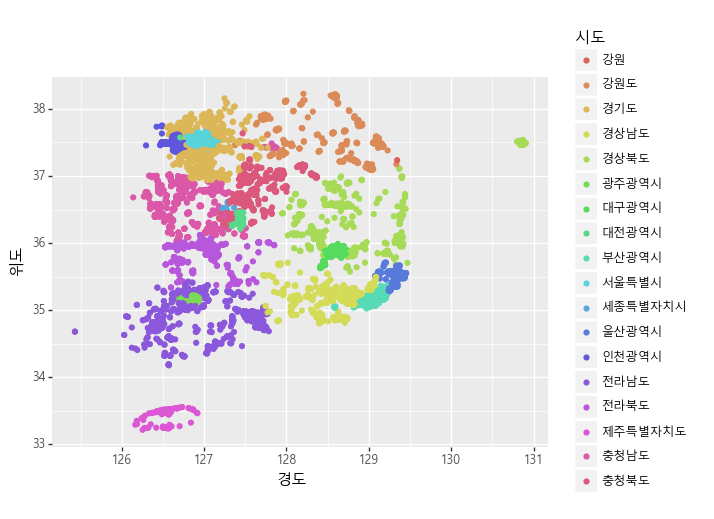

<ggplot: (-9223371866771957164)>

In [28]:
(ggplot(park_loc_notnull)
+aes(x='경도',y='위도',color='시도')
+geom_point()
+theme(text=element_text(family='Malgun Gothic')) 
)

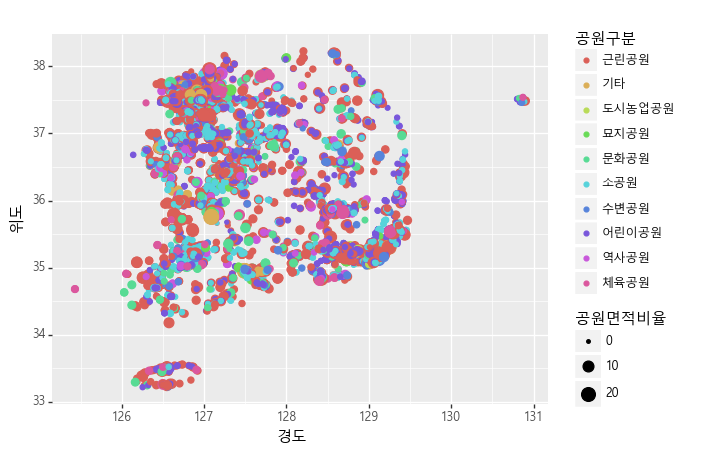

<ggplot: (-9223371866772908048)>

In [29]:
(ggplot(park_loc_notnull)
+aes(x='경도',y='위도',color='공원구분',size='공원면적비율')
+geom_point()
+theme(text=element_text(family='Malgun Gothic')) 
)

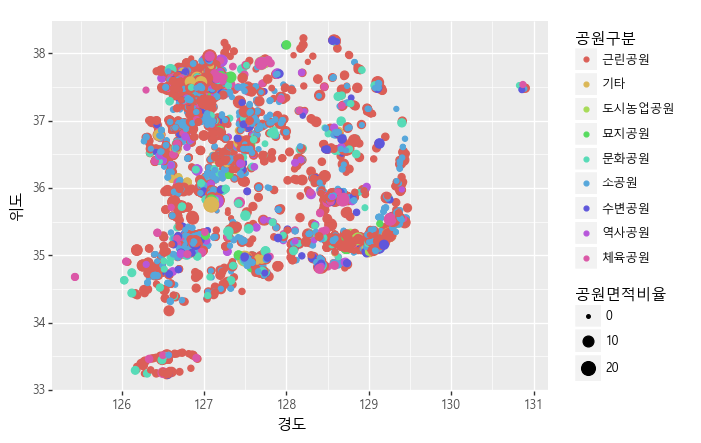

<ggplot: (-9223371866772627844)>

In [30]:
#어린이공원 뺸 그래프
(ggplot(park_loc_notnull.loc[park_loc_notnull['공원구분'] != '어린이공원'])
+aes(x='경도',y='위도',color='공원구분',size='공원면적비율')
+geom_point()
+theme(text=element_text(family='Malgun Gothic')) 
)

In [31]:
park_loc_notnull.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,공원면적비율,시도,구군
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,0.955877,부산광역시,강서구
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,1.837281,부산광역시,강서구
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,0.254165,부산광역시,강서구
3,26440-00004,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,0.402492,부산광역시,강서구
4,26440-00005,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,0.317648,부산광역시,강서구


In [32]:
park_do=pd.DataFrame(park['시도'].value_counts())
park_do

,시도
경기도,3318
전라남도,1882
경상남도,1825
서울특별시,1745
충청남도,1723
전라북도,1137
경상북도,917
충청북도,899
울산광역시,887
인천광역시,675


In [33]:
park_do_normal=pd.DataFrame(park['시도'].value_counts(normalize=True))
park_do_normal

,시도
경기도,0.182941
전라남도,0.103766
경상남도,0.100623
서울특별시,0.096212
충청남도,0.094999
전라북도,0.062690
경상북도,0.050560
충청북도,0.049567
울산광역시,0.048906
인천광역시,0.037217


In [34]:
park_sido=park_do.merge(park_do_normal,left_index=True,
    right_index=True).reset_index()
park_sido.columns=['시도','합계','비율']
park_sido=park_sido.sort_values(by=['합계'],ascending=False)
park_sido

,시도,합계,비율
0,경기도,3318,0.182941
1,전라남도,1882,0.103766
2,경상남도,1825,0.100623
3,서울특별시,1745,0.096212
4,충청남도,1723,0.094999
5,전라북도,1137,0.062690
6,경상북도,917,0.050560
7,충청북도,899,0.049567
8,울산광역시,887,0.048906
9,인천광역시,675,0.037217


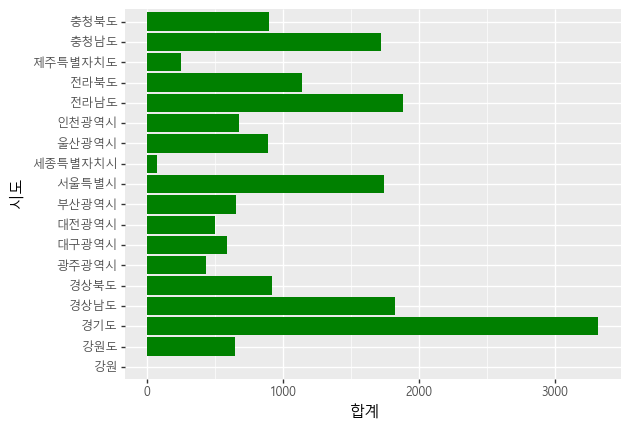

<ggplot: (-9223371866768776264)>

In [35]:
(ggplot(park_sido)
+aes(x='시도',y='합계')
+geom_bar(stat='identity',position='dodge',fill='green')
+coord_flip()
+theme(text=element_text(family='Malgun Gothic')) 
)

In [36]:
park_type=park['공원구분'].value_counts().reset_index()
park_type.columns=['공원구분','합계']
park_type

,공원구분,합계
0,어린이공원,9987
1,근린공원,4170
2,소공원,2647
3,문화공원,322
4,수변공원,301
5,기타,260
6,체육공원,230
7,역사공원,164
8,묘지공원,43
9,도시농업공원,13


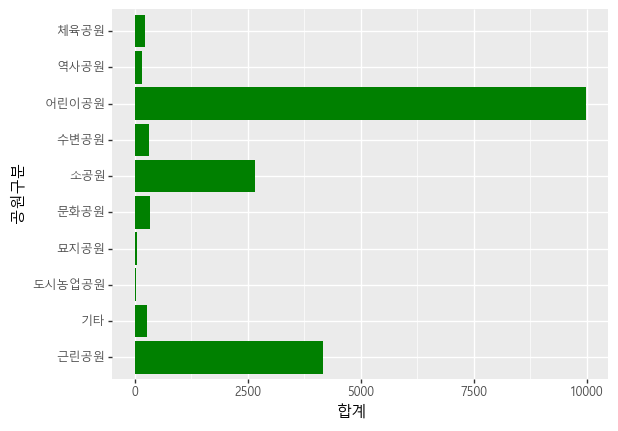

<ggplot: (-9223371866771901084)>

In [37]:
(ggplot(park_type)
+aes(x='공원구분',y='합계')
+geom_bar(stat='identity',position='dodge',fill='green')
+coord_flip()
+theme(text=element_text(family='Malgun Gothic')) 
)

In [38]:
gg=park.loc[park['시도']=='경기도']
gg.shape

(3318, 13)

In [39]:
gg_park=gg['공원구분'].value_counts().reset_index()
gg_park.columns=['공원구분','합계']
gg_park

,공원구분,합계
0,어린이공원,1821
1,근린공원,806
2,소공원,406
3,문화공원,91
4,체육공원,73
5,수변공원,61
6,역사공원,34
7,기타,17
8,묘지공원,8
9,도시농업공원,1


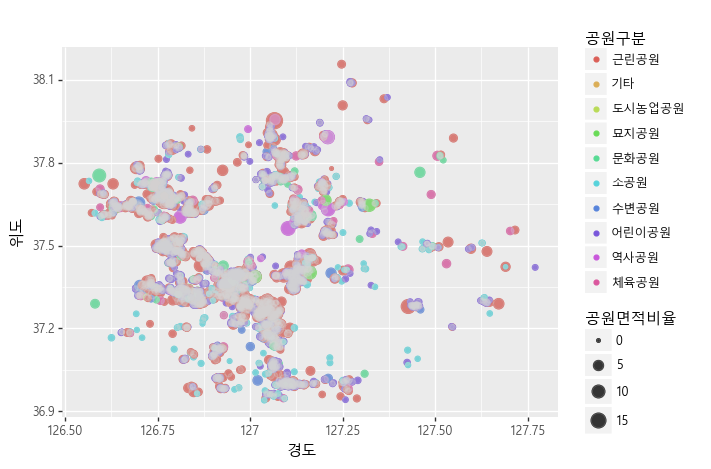

<ggplot: (-9223371866771918160)>

In [40]:
(ggplot(gg)
+aes(x='경도',y='위도',color='공원구분',size='공원면적비율')
+geom_point()
+geom_jitter(color='lightgray',alpha=0.25)
+theme(text=element_text(family='Malgun Gothic')) 
)

In [41]:
gg_suwon=gg.loc[gg['구군']=='수원시']
gg_suwon.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,공원면적비율,시도,구군
16666,41117-00081,소담,어린이공원,경기도 수원시 영통구 태장로 84 (망포동),경기도 수원시 영통구 태장로 84 (망포동),37.238966,127.055529,900.0,031-228-4282,2019-09-07,0.300000,경기도,수원시
16667,41111-00080,제17호 소공원(송원),소공원,경기도 수원시 장안구 조원동 912-2,경기도 수원시 장안구 조원동 912-2,37.307711,127.011307,3002.0,031-228-4282,2019-09-07,0.547905,경기도,수원시
16668,41113-00081,제18호 소공원,소공원,경기도 수원시 권선구 삼천병마로1598번길 28-28 (오목천동),경기도 수원시 권선구 삼천병마로1598번길 28-28 (오목천동),37.245841,126.966211,174.0,031-228-4282,2019-09-07,0.131909,경기도,수원시
16669,41113-00082,제28호 소공원,소공원,경기도 수원시 권선구 권선동 1367-14,경기도 수원시 권선구 권선동 1367-14,37.247521,127.026383,1104.8,031-228-4282,2019-09-07,0.332385,경기도,수원시
16670,41113-00083,제29호 소공원,소공원,경기도 수원시 권선구 권선동 1367-26,경기도 수원시 권선구 권선동 1367-26,37.248903,127.020938,1030.3,031-228-4282,2019-09-07,0.320983,경기도,수원시


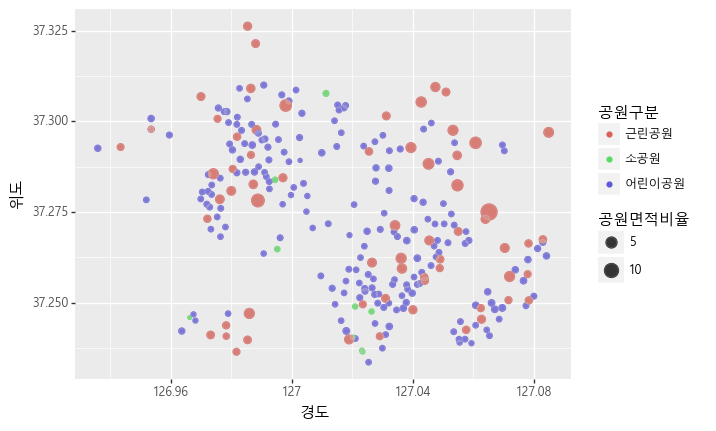

<ggplot: (-9223371866768217696)>

In [42]:
(ggplot(gg_suwon)
+aes(x='경도',y='위도',color='공원구분',size='공원면적비율')
+geom_point()
+geom_jitter(color='lightgray',alpha=0.25)
+theme(text=element_text(family='Malgun Gothic')) 
)

In [43]:
geo_df=gg_suwon
map=folium.Map(location=[geo_df['위도'].mean(),geo_df['경도'].mean()],zoom_start=13)

for n in geo_df.index:
    park_name=geo_df['공원명'][n]+'-'+geo_df['소재지도로명주소'][n]
    #park_name=geo_df.loc[n,'공원명']+'-'+geo_df.loc[n,'소재지도로명주소']
    icon_color='blue'
    folium.CircleMarker(
        location=[geo_df['위도'][n],geo_df['경도'][n]],
        #location=[geo_df.loc[n,'위도'],geo_df.loc[n,'경도']
        radius=geo_df['공원면적비율'][n],
        popup=park_name,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map

In [44]:
park_type=r'.*((역사|체육|수변|문화|묘지)공원).*'
gg_sample=gg.loc[gg['공원구분'].str.match(park_type)]
gg_sample.shape

(267, 13)

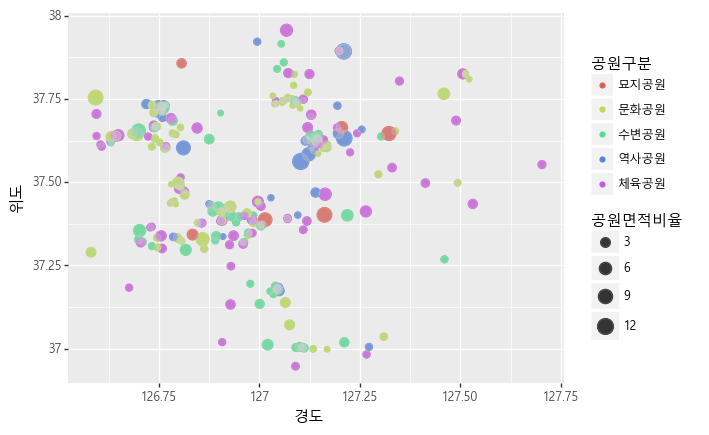

<ggplot: (-9223371866767186992)>

In [45]:
(ggplot(gg_sample)
+aes(x='경도',y='위도',color='공원구분',size='공원면적비율')
+geom_point()
+geom_jitter(color='lightgray',alpha=0.25)
+theme(text=element_text(family='Malgun Gothic')) 
)

In [46]:
geo_df=gg_sample
map=folium.Map(location=[geo_df['위도'].mean(),geo_df['경도'].mean()],zoom_start=10)

for n in geo_df.index:
    park_name=geo_df['공원명'][n]+'-'+geo_df['소재지도로명주소'][n]
    
    folium.Marker(
        location=[geo_df['위도'][n],geo_df['경도'][n]],
        popup=park_name).add_to(map)

map

In [47]:
park=park_loc_notnull

In [48]:
seoul=park[park['시도']=='서울특별시']
seoul.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,공원면적비율,시도,구군
213,11710-00001,가락,근린공원,서울특별시 송파구 양재대로64길 42,서울특별시 송파구 가락동 37,37.498469,127.125124,27648.2,02-2147-3380,2019-05-31,1.662775,서울특별시,송파구
214,11710-00002,개나리,근린공원,서울특별시 송파구 잠실동 44-6,서울특별시 송파구 잠실동 44-6,37.507553,127.094089,6669.1,02-2147-3380,2019-05-31,0.816646,서울특별시,송파구
215,11710-00003,개롱,근린공원,서울특별시 송파구 동남로 178,서울특별시 송파구 가락동 195,37.493407,127.130026,21544.4,02-2147-3380,2019-05-31,1.467801,서울특별시,송파구
216,11710-00004,거여,근린공원,서울특별시 송파구 오금로51길 20,서울특별시 송파구 거여동 11,37.497007,127.140981,16185.1,02-2147-3380,2019-05-31,1.272207,서울특별시,송파구
217,11710-00005,건너말,근린공원,서울특별시 송파구 중대로10길 29,서울특별시 송파구 가락동 110,37.491603,127.123473,11327.8,02-2147-3380,2019-05-31,1.064321,서울특별시,송파구


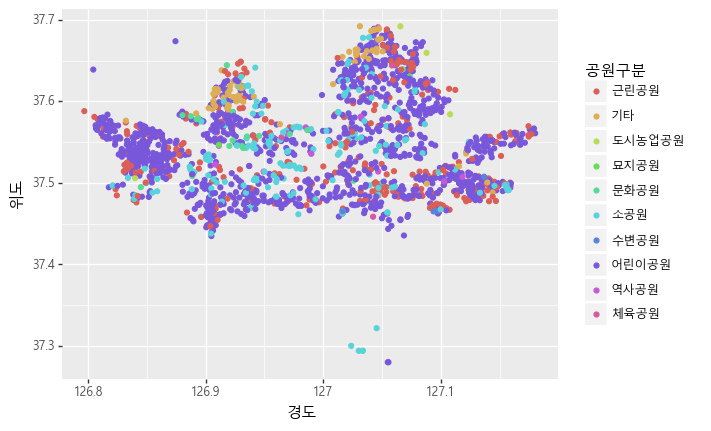

<ggplot: (-9223371866765839824)>

In [49]:
(ggplot(seoul)
+aes(x='경도',y='위도',color='공원구분')
+geom_point()
+theme(text=element_text(family='Malgun Gothic')) 
)

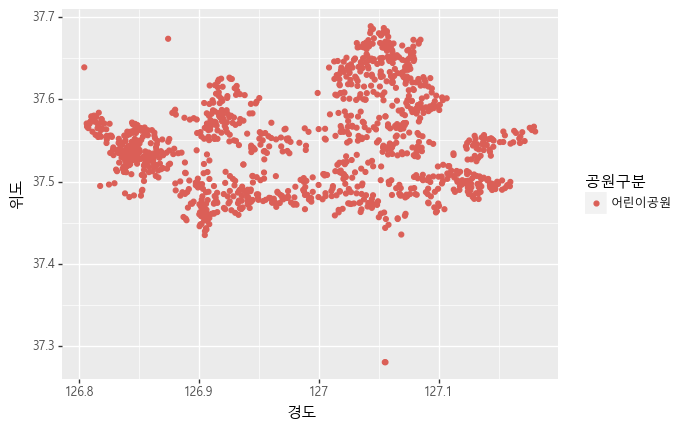

<ggplot: (-9223371866767872308)>

In [50]:
(ggplot(seoul[seoul['공원구분']=='어린이공원'])
+aes(x='경도',y='위도',color='공원구분')
+geom_point()
+theme(text=element_text(family='Malgun Gothic')) 
)

In [51]:
seoul[seoul['위도']<37.4]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,공원면적비율,시도,구군
5828,11215-10514,세모꼴공원,소공원,서울특별시 광진구 자양1동 859-1,서울특별시 광진구 자양1동 859-1,37.32188,127.04541,862.0,02-450-7775,2019-02-26,0.293598,서울특별시,광진구
7097,11680-00129,역삼미소공원,소공원,서울특별시 강남구 역삼동 711-5,서울특별시 강남구 역삼동 711-5,37.30030,127.02380,576.0,02-3423-6245,2019-08-27,0.240000,서울특별시,강남구
7098,11680-00130,도곡햇살공원,소공원,서울특별시 강남구 도곡동 538-4,서울특별시 강남구 도곡동 538-4,37.29420,127.03020,558.5,02-3423-6245,2019-08-27,0.236326,서울특별시,강남구
7099,11680-00131,도담공원,어린이공원,서울특별시 강남구 세곡동 548,서울특별시 강남구 세곡동 548,37.28020,127.05550,4282.7,02-3423-6247,2019-08-27,0.654423,서울특별시,강남구
7100,11680-00132,행복공원,어린이공원,서울특별시 강남구 세곡동 546,서울특별시 강남구 세곡동 546,37.28020,127.05490,2483.5,02-3423-6247,2019-08-27,0.498347,서울특별시,강남구
7101,11680-00133,대치에스케이뷰1 소공원,소공원,서울특별시 강남구 대치동 1029-2,서울특별시 강남구 대치동 1029-2,37.29440,127.03370,302.0,02-3423-6244,2019-08-27,0.173781,서울특별시,강남구
7102,11680-00134,대치에스케이뷰2 소공원,소공원,서울특별시 강남구 대치동 1029-3,서울특별시 강남구 대치동 1029-3,37.29410,127.03350,481.0,02-3423-6244,2019-08-27,0.219317,서울특별시,강남구


In [52]:
seoul['공원구분'].value_counts()

어린이공원     1117
근린공원       331
소공원        183
기타          70
문화공원        19
역사공원        11
체육공원         4
수변공원         4
도시농업공원       4
묘지공원         1
Name: 공원구분, dtype: int64

In [53]:
seoul_playground=seoul[seoul['공원구분']=='어린이공원']
seoul_playground.shape

(1117, 13)

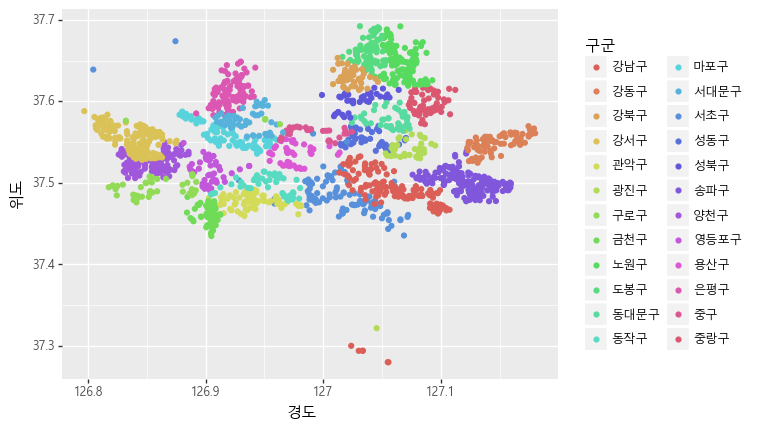

<ggplot: (-9223371866772991140)>

In [54]:
(ggplot(seoul)
+aes(x='경도',y='위도',color='구군')
+geom_point()
+theme(text=element_text(family='Malgun Gothic')) 
)

In [55]:
gu = '강남구 강동구 강북구 강서구 관악구 광진구 구로구 금천구 노원구 도봉구 동대문구 동작구 마포구 서대문구 서초구 성동구 성북구 송파구 양천구 영등포구 용산구 은평구 종로구 중구 중랑구'
gu = gu.split(' ')
print('서울에는 {}개의 구가 있다.'.format(len(gu)))

서울에는 25개의 구가 있다.


In [56]:
seoul_gu=seoul['구군'].value_counts().reset_index()
seoul_gu.columns=['구군','합계']
seoul_gu=seoul_gu.sort_values(by='합계',ascending=False)
seoul_gu

,구군,합계
0,송파구,158
1,강서구,139
2,강남구,134
3,노원구,118
4,서초구,114
5,은평구,98
6,양천구,94
7,마포구,80
8,관악구,76
9,강동구,74


In [60]:
seoul_gu_unique=seoul_gu['구군'].unique()
seoul_gu_unique

array(['송파구', '강서구', '강남구', '노원구', '서초구', '은평구', '양천구', '마포구', '관악구',
       '강동구', '도봉구', '중랑구', '서대문구', '금천구', '동작구', '성동구', '구로구', '강북구',
       '동대문구', '성북구', '영등포구', '용산구', '광진구', '중구'], dtype=object)

In [61]:
error_gu = [g for g in seoul_gu_unique if not g in gu] 
print('잘못들어간 구: {}'.format(error_gu))

잘못들어간 구: []


In [62]:
exclude_gu = [g for g in gu if not g in seoul_gu_unique] 
print('누락된 구: {}'.format(exclude_gu))

누락된 구: ['종로구']


In [63]:
seoul_gu_count = len(gu) - len(exclude_gu) - len(error_gu)
print('아래 데이터를 보니 몇개 구가 누락된것을 알 수 있다. 전체 {}개 구 중 {}개 구만 있다.'.format(len(gu), seoul_gu_count))
seoul_gu

아래 데이터를 보니 몇개 구가 누락된것을 알 수 있다. 전체 25개 구 중 24개 구만 있다.


,구군,합계
0,송파구,158
1,강서구,139
2,강남구,134
3,노원구,118
4,서초구,114
5,은평구,98
6,양천구,94
7,마포구,80
8,관악구,76
9,강동구,74


In [78]:
geo_df=seoul.loc[seoul['구군'].str.contains('강남|서초|송파')]
geo_df.isnull().sum()

관리번호        0
공원명         0
공원구분        0
소재지도로명주소    0
소재지지번주소     0
위도          0
경도          0
공원면적        0
전화번호        0
데이터기준일자     0
공원면적비율      0
시도          0
구군          0
dtype: int64

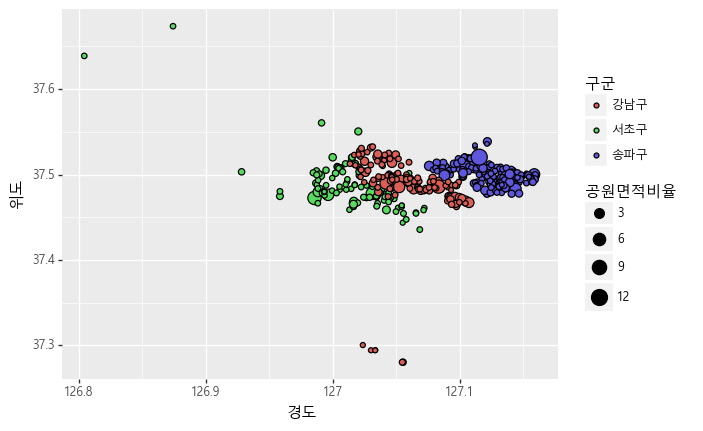

<ggplot: (-9223371866768603900)>

In [79]:
(ggplot(geo_df)
+aes(x='경도',y='위도',fill='구군',size='공원면적비율')
+geom_point()
+theme(text=element_text(family='Malgun Gothic'))
)

In [81]:

map=folium.Map(location=[geo_df['위도'].mean(),geo_df['경도'].mean()],zoom_start=13)

for n in geo_df.index:
    park_name=geo_df['공원명'][n]+'-'+geo_df['소재지도로명주소'][n]
    
    folium.Marker(
        location=[geo_df['위도'][n],geo_df['경도'][n]],
        popup=park_name).add_to(map)

map

In [82]:
jeju=park.loc[park['시도']=='제주특별자치도']
jeju.shape

(246, 13)

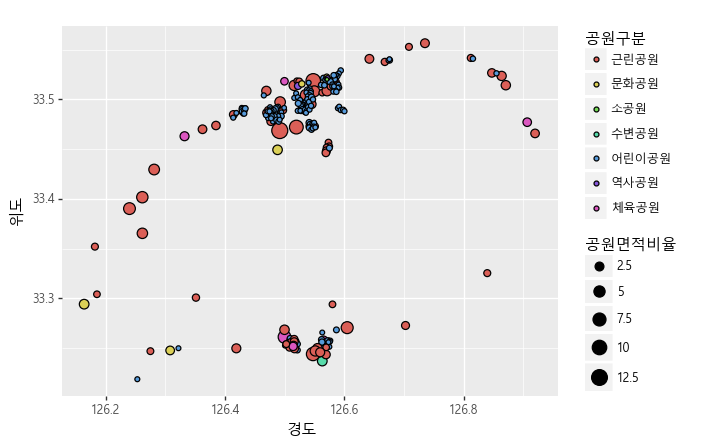

<ggplot: (-9223371866767311208)>

In [84]:
(ggplot(jeju)
+aes(x='경도',y='위도',fill='공원구분',size='공원면적비율')
+geom_point()
+theme(text=element_text(family='Malgun Gothic'))
)

In [86]:
geo_df=jeju
map=folium.Map(location=[geo_df['위도'].mean(),geo_df['경도'].mean()],zoom_start=10)

for n in geo_df.index:
    park_name=geo_df['공원명'][n]+'-'+geo_df['소재지도로명주소'][n]
    
    folium.Marker(
        location=[geo_df['위도'][n],geo_df['경도'][n]],
        popup=park_name).add_to(map)

map

In [89]:
geo_df=jeju
map=folium.Map(location=[geo_df['위도'].mean(),geo_df['경도'].mean()],zoom_start=13)

for n in geo_df.index:
    park_name=geo_df['공원명'][n]+'-'+geo_df['소재지도로명주소'][n]
    #park_name=geo_df.loc[n,'공원명']+'-'+geo_df.loc[n,'소재지도로명주소']
    icon_color='blue'
    folium.CircleMarker(
        location=[geo_df['위도'][n],geo_df['경도'][n]],
        #location=[geo_df.loc[n,'위도'],geo_df.loc[n,'경도']]
        radius=geo_df['공원면적비율'][n],
        popup=park_name,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map